### Assignment: Sentiment Analysis Using Recurrent Neural Networks (RNN) with IMDB Dataset 

#### 1. Understanding Sentiment Analysis and RNNs


#### Sentiment Analysis and Recurrent Neural Networks (RNNs)

#### What is Sentiment Analysis?
Sentiment analysis is the process of identifying and extracting opinions from text to classify them as positive, negative, or neutral. It has numerous applications such as:
- **Customer feedback analysis:** Understanding consumer sentiment about products or services.
- **Social media monitoring:** Tracking brand reputation and public opinions.
- **Market research:** Gaining insights into market trends.

#### How RNNs Differ from Traditional Feedforward Neural Networks
- **Sequential Data Handling:** RNNs process sequences of data and retain information from previous inputs through hidden states, unlike feedforward networks that treat each input independently.
- **Memory Mechanism:** RNNs use hidden states to "remember" context, making them effective for tasks involving sequential relationships.

#### Hidden States and Information Flow
RNNs compute a hidden state at each time step, capturing context from previous inputs:
\[h_t = f(W \cdot x_t + U \cdot h_{t-1} + b)
\]
Where:
- \(h_t\): Hidden state at time \(t\).
- \(x_t\): Input at time \(t\).
- \(W, U, b\): Trainable parameters.

#### Common Issues with RNNs
- **Vanishing Gradients:** Gradients diminish during backpropagation, making it difficult to train long sequences.
- **Exploding Gradients:** Gradients grow uncontrollably, destabilizing the training process.

#### Solutions:
- Use advanced architectures like **LSTM** or **GRU**.
- Apply **gradient clipping** to control gradient values.
- Use proper weight initialization.


#### 2. Dataset Preparation

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Load IMDB dataset
vocab_size = 10000
max_length = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Padding sequences
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

# Display sample data
print("Sample Tokenized Review:", x_train[0])
print("Sample Target:", y_train[0])

Sample Tokenized Review: [   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  

#### 3. Building the RNN Model

The RNN model is designed to classify text sentiment using the following layers:
- **Input Layer:** Accepts tokenized and padded sequences.
- **Embedding Layer:** Converts words into dense vectors.
- **RNN Layer (LSTM):** Retains sequential relationships.
- **Fully Connected Layer:** Learns complex features.
- **Output Layer:** Provides binary classification (positive/negative).

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Model architecture
embedding_dim = 128
model = Sequential([
    #Embedding converts words into dense vectors of fixed size
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    #LSTM layer retains sequential information
    LSTM(units=64, return_sequences=False),
    # Dropout for regularization
    Dropout(0.5),
    # Fully conected layer to learn feature interactions
    Dense(32, activation='relu'),
    Dropout(0.5),
    # Output layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Keshav Gautam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### 4. Training the Model

In [3]:
# Split data into training and validation sets
from sklearn.model_selection import train_test_split

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    x_train_split, y_train_split,
    validation_data=(x_val_split, y_val_split),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping]
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 74ms/step - accuracy: 0.5031 - loss: 0.6936 - val_accuracy: 0.5368 - val_loss: 0.6868
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - accuracy: 0.5848 - loss: 0.6719 - val_accuracy: 0.6236 - val_loss: 0.6685
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.6258 - loss: 0.6587 - val_accuracy: 0.5428 - val_loss: 0.6786
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.6203 - loss: 0.6197 - val_accuracy: 0.6030 - val_loss: 0.6340
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.6948 - loss: 0.5578 - val_accuracy: 0.8080 - val_loss: 0.4855
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.8487 - loss: 0.3992 - val_accuracy: 0.7250 - val_loss: 0.5346
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.8689 - loss: 0.3532 - val_accuracy: 0.8376 - val_loss: 0.4140
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.9279 - loss: 0.2260 - 

#### 5. Evaluating the Model

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8239 - loss: 0.4458
Test Accuracy: 0.83


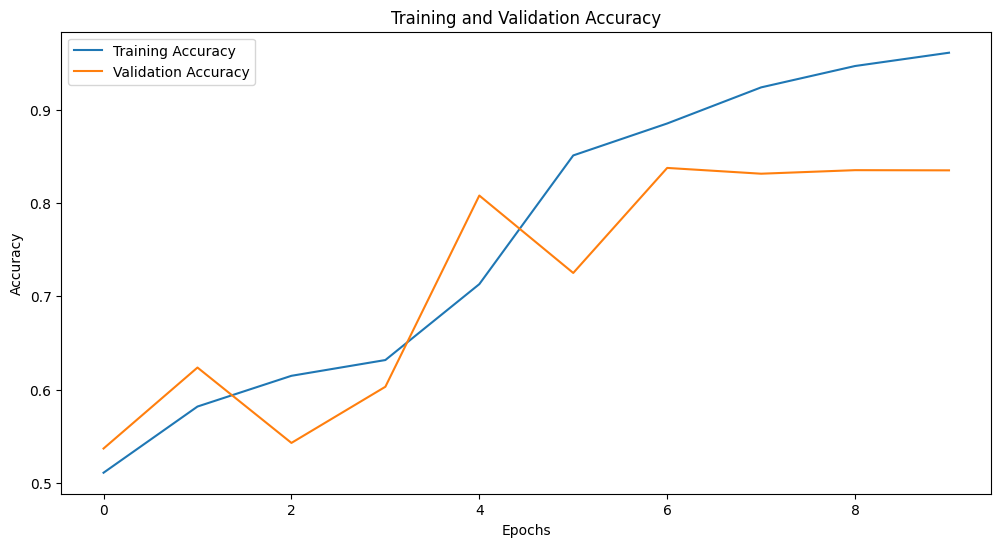

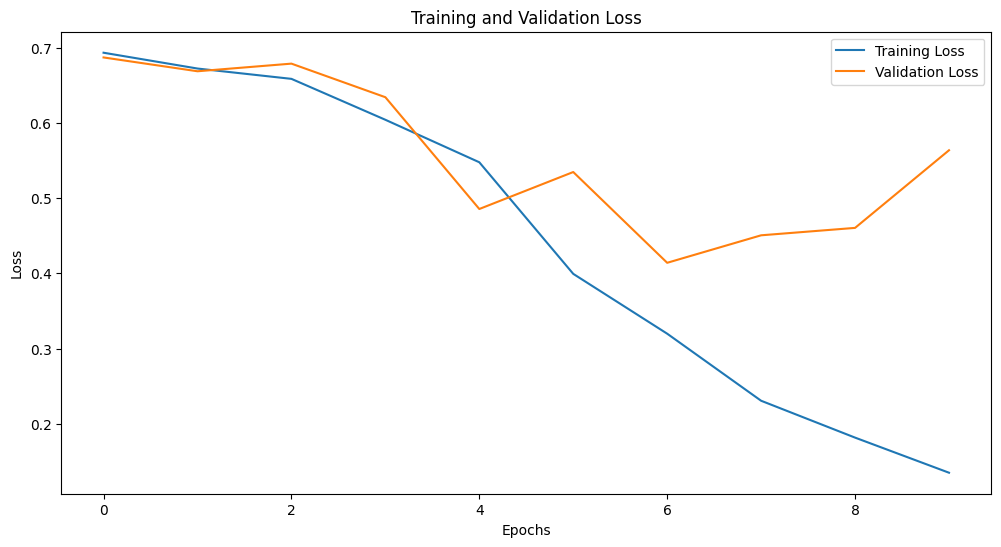

In [4]:
import matplotlib.pyplot as plt

# Evaluate model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### 6. Hyperparameter Tuning 

Experiment with:
Different numbers of LSTM units (e.g., 32, 64, 128).
Dropout rates (e.g., 0.3, 0.5).
Learning rates (use a learning rate scheduler).
Batch sizes (e.g., 32, 64, 128).

In [ ]:
# Modify LSTM units
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(units=128, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

c:\Users\Keshav Gautam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


#### 7. Comparative Analysis

Feedforward Neural Network:

A Feedforward Neural Network (FNN) is implemented to compare performance against the RNN. RNNs generally outperform FNNs in sequential tasks due to their ability to model temporal dependencies.

In [7]:
from tensorflow.keras.layers import Flatten

# Build a simple feedforward network
ff_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

ff_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the feedforward model
ff_history = ff_model.fit(
    x_train_split, y_train_split,
    validation_data=(x_val_split, y_val_split),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping]
)

# Compare RNN and feedforward performance
ff_test_loss, ff_test_accuracy = ff_model.evaluate(x_test, y_test)
print(f"Feedforward Test Accuracy: {ff_test_accuracy:.2f}")
print(f"RNN Test Accuracy: {test_accuracy:.2f}")

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6433 - loss: 0.5948 - val_accuracy: 0.8388 - val_loss: 0.3686
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9550 - loss: 0.1400 - val_accuracy: 0.8222 - val_loss: 0.4600
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9959 - loss: 0.0205 - val_accuracy: 0.8358 - val_loss: 0.5331
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9987 - loss: 0.0089 - val_accuracy: 0.8200 - val_loss: 0.6563
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8318 - loss: 0.3737
Feedforward Test Accuracy: 0.83
RNN Test Accuracy: 0.80


Recurrent Neural Networks (RNNs) outperform Feedforward Neural Networks (FNNs) in sentiment analysis because they handle sequential data, retain context through hidden states, and model word relationships, resulting in higher accuracy. However, RNNs are computationally intensive, prone to overfitting, and require careful tuning. In contrast, FNNs are simpler, train faster, and are less resource-demanding but lack the ability to capture sequential dependencies, leading to lower performance in text-based tasks. While FNNs are suitable for tasks where word order is less critical, RNNs, especially with LSTMs or GRUs, are better for understanding nuanced patterns in text, making them the preferred choice for this assignment.